# Building a Newclid problem from a geogebra export

This tutorial will show you how to build and solve a geometric problem built with Geogebra.

In [8]:
try:
    import newclid
except ImportError:
    !pip install -q "newclid>=3" "py-yuclid"

## Build a NcProblem from a Geogebra .ggb export

Use the ggb_file_path to point to your GeoGebra export. The name of the file will become the identifier of the problem.

In [9]:
from pathlib import Path

path_to_folder = "./ggb_exports"
problem_id = "incenter"
ggb_file_path = Path(path_to_folder, f"{problem_id}.ggb")

### Specifying goals

You must specify the goals manually as a list of strings, as they cannot be expressed in GeoGebra.

In [10]:
from newclid.problem import PredicateConstruction

goal_strings = ["eqangle C B B D B D B A"]
goals = [PredicateConstruction.from_str(goal) for goal in goal_strings]

## Building problem

With the goals, you can build the problem. That means turning the GeoGebra data into a NcProblem that can be solved by the engine. The visualization allows you to check the information imported from the ggb model.

In [11]:
from newclid.ggb.problem_builder import GeogebraProblemBuilder

ggb_problem_builder = GeogebraProblemBuilder(ggb_file_path=ggb_file_path).with_goals(
    goals
)
problem = ggb_problem_builder.build()
print(problem.pretty_str())

Built the problem incenter with assumptions:
eqangle A B B D B D B C
eqangle A C C D C D B C

and goals:
eqangle A B B D B D B C

Using points:
A (0.0, 4.0)
B (-4.0, 0.0)
C (4.0, 0.0)
D (0.0, 1.6568542494923801)



### Adapting assumptions


When building a GeoGebra problem, there is not a perfect correspondence between GeoGebra constructions and Newclid constructions and predicates.

For example, if you want to build two similar triangles, you may use a combination of constructions to transfer angles without wanting eqangle predicates, but looking for eqratio predicates instead.

In general, you may sometimes need to add extra points or predicatess on the GeoGebra side in order to get the construction you want.

You can correct this in multiple ways:
- Hide points on the GeoGebra picture and they will then be excluded from the built NcProblem.
- Add a list of extra assumptions manually on built points as below.
- Remove a list of assumptions that are made from the GeoGebra construction as below.

If you try to add an assumption that is numerically false, you will get an error when trying to solve the problem.

In [12]:
extra_assumptions_to_add_strings = ["eqangle A B A D A D A C"]
extra_assumptions = [
    PredicateConstruction.from_str(assumption)
    for assumption in extra_assumptions_to_add_strings
]

assumptions_to_remove_strings = ["eqangle A B B D B D B C"]
assumptions_to_remove = [
    PredicateConstruction.from_str(assumption)
    for assumption in assumptions_to_remove_strings
]

ggb_problem_builder = (
    GeogebraProblemBuilder(
        ggb_file_path=ggb_file_path,
    )
    .with_goals(goals)
    .with_extra_assumptions(extra_assumptions)
    .without_assumptions(assumptions_to_remove)
)
problem = ggb_problem_builder.build()

print(problem.pretty_str())

Built the problem incenter with assumptions:
eqangle A B A D A D A C
eqangle A C C D C D B C

and goals:
eqangle A B B D B D B C

Using points:
A (0.0, 4.0)
B (-4.0, 0.0)
C (4.0, 0.0)
D (0.0, 1.6568542494923801)



## Solving the NcProblem

You can then solve the problem from the NcProblem you built above.

In [13]:
import numpy as np
from newclid.api import GeometricSolverBuilder

rng = np.random.default_rng(0)

solver = GeometricSolverBuilder(rng=rng).build(problem)
solver.run()

natural_language_proof = solver.proof()
print(natural_language_proof)
print()

assert solver.run_infos is not None, (
    "Solver needs to be run before accessing the run_infos"
)
print("Run infos:\n", solver.run_infos.model_dump_json(indent=2))

# Problem setup:

## Points

- A(0.0000, 4.0000)
- B(-4.0000, 0.0000)
- C(4.0000, 0.0000)
- D(0.0000, 1.6569)

## Assumptions:

[C0] : ∠(AB,AD) = ∠(AD,AC)
[C1] : ∠(AC,CD) = ∠(CD,BC)

## Numerical checks

[N0] : A, B, C are not collinear


# Goals

∠(AB,BD) = ∠(BD,BC) : Proved [0]


# Proof:

000. | ∠(AB,AD) = ∠(AD,AC) [C0], ∠(AC,CD) = ∠(CD,BC) [C1], A, B, C are not collinear [N0] =(r46 Incenter theorem)> ∠(AB,BD) = ∠(BD,BC) [0]


# Appendix: AR deductions:

End of proof.

Run infos:
 {
  "runtime": 0.013492345809936523,
  "success": true,
  "steps": 6,
  "success_per_goal": {
    "∠(AB,BD) = ∠(BD,BC) succeeded": true
  },
  "agent_stats": {
    "agent_type": "follow_deductions",
    "n_deductions_stored": 5,
    "n_deductions_followed": 5
  }
}


(eqangle A B A D A D A C, eqangle A C C D C D B C, ncoll A B C)


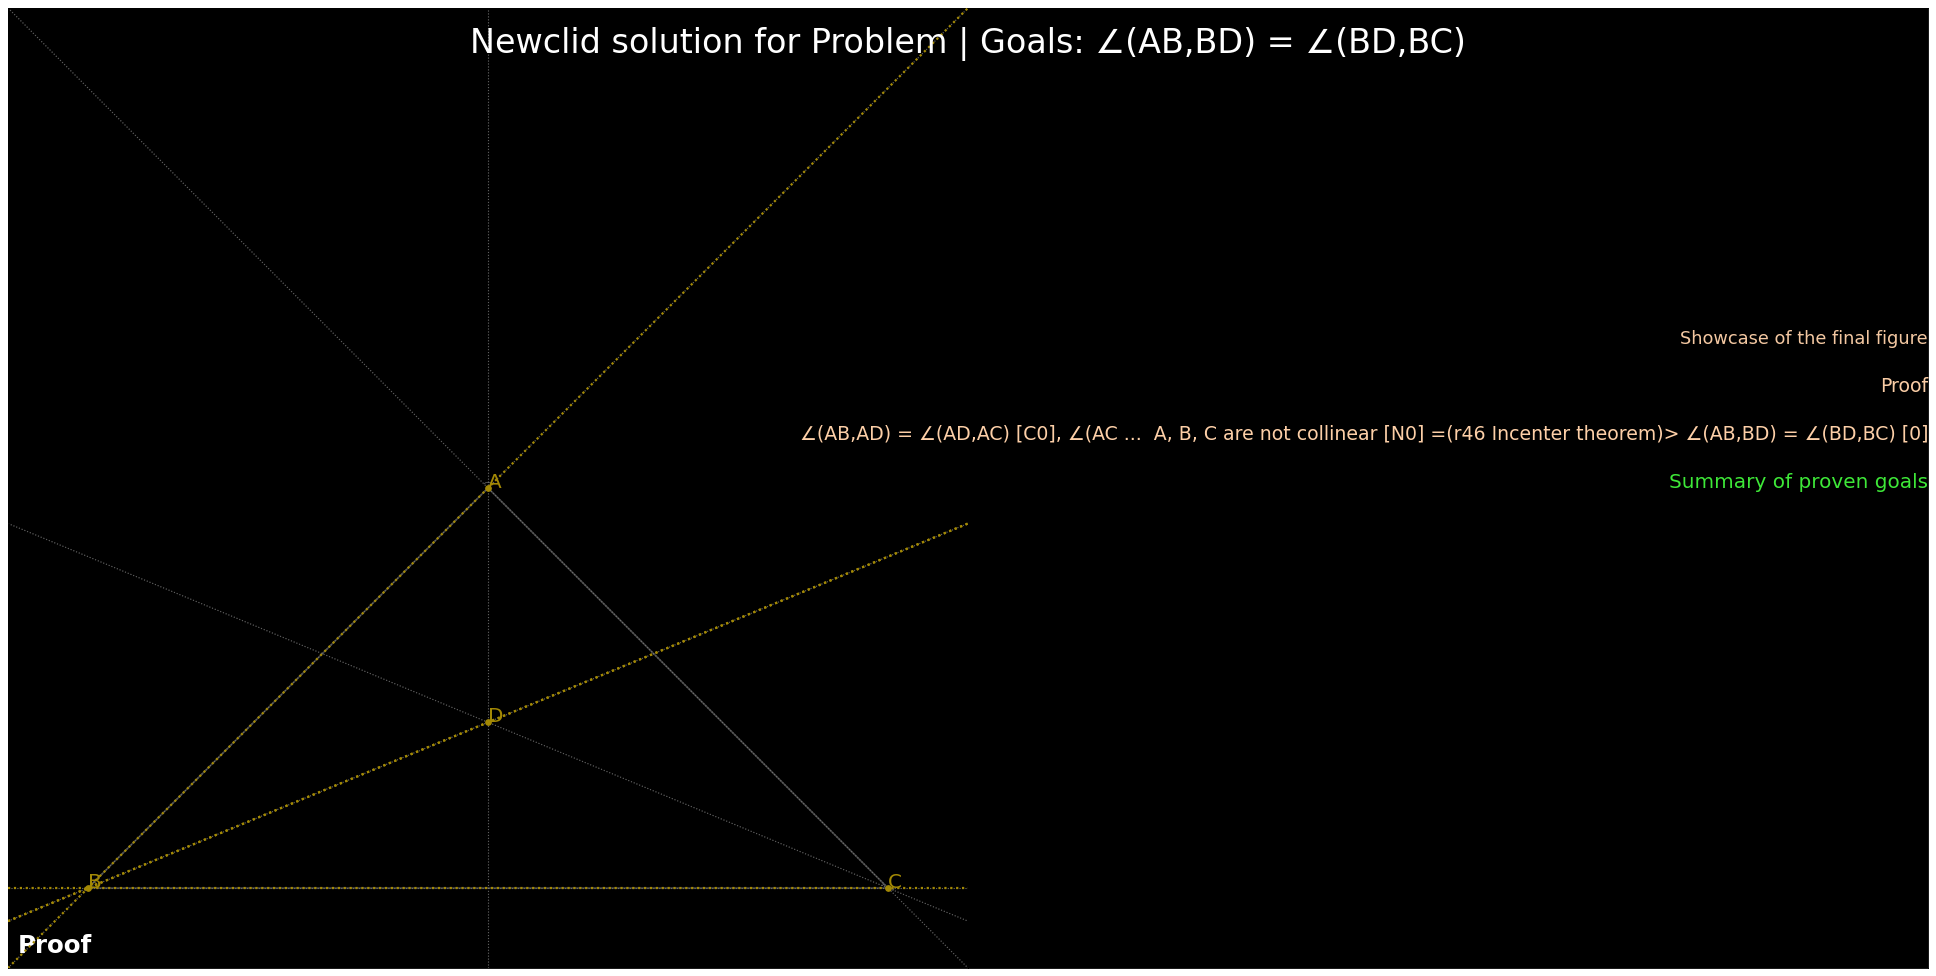

In [14]:
from IPython.display import HTML
from newclid.animation import html_animation

HTML(html_animation(solver.animate()))